# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
rows = soup.find_all('td')

In [7]:
# Create list of column names by extracting 'th' tags
column_list = []
columns = soup.find_all('th')
for column in columns:
    column_list.append(column.text)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list to hold rows, and a temporary list for the loop
row_list = []
temp = []

# Loop through the scraped data to create a list of rows
for row in rows:
    temp.append(row.text)
    # Check length of temp, append to row_list and reset temp list
    if len(temp) == 7:  
        row_list.append(temp)
        temp = []  

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(row_list, columns=column_list)

In [10]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
types = {'terrestrial_date':'datetime64[ns]',
        'sol':'int32',
        'ls':'int32',
        'month':'int32',
        'min_temp':'float64',
        'pressure':'float64'}
mars_df = mars_df.astype(types)


In [13]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
len(mars_df['month'].unique())

12

In [15]:
# 2. How many sols (Martian days) worth of data are there?
mars_df['sol'].count()

1867

In [16]:
# 3. What is the average minimum temperature by month?
mars_df.groupby('month')['min_temp'].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [17]:
# Create dataframe from the grouped data (min temp)
min_temp_by_month = pd.DataFrame(mars_df.groupby('month')['min_temp'].mean())

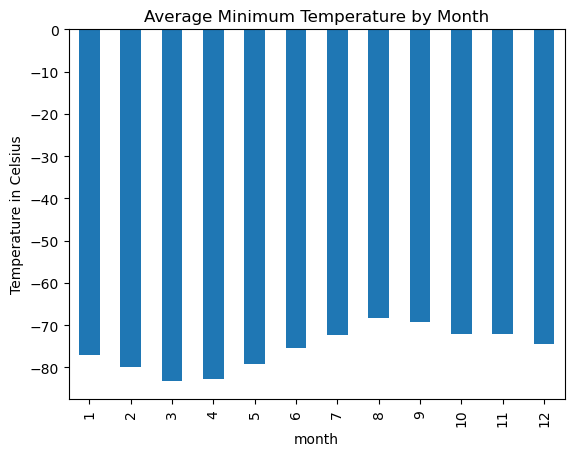

In [18]:
# Plot the average minimum temperature by month
min_temp_by_month.plot.bar(ylabel='Temperature in Celsius', title='Average Minimum Temperature by Month', legend=False)
plt.show()

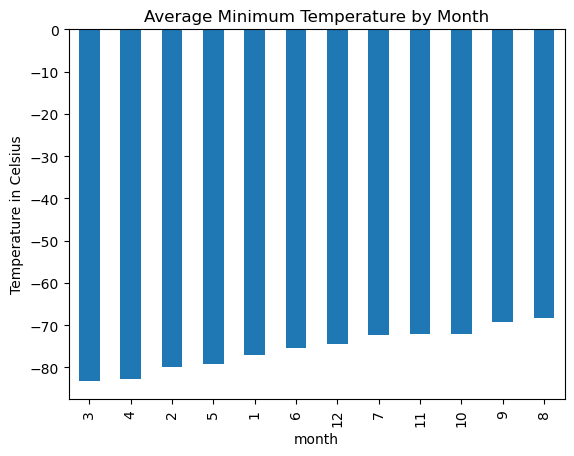

In [19]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
min_temp_by_month_sorted = min_temp_by_month.sort_values(by='min_temp')
min_temp_by_month_sorted.plot.bar(ylabel='Temperature in Celsius', title='Average Minimum Temperature by Month', legend=False)
plt.show()

In [20]:
# 4. What is the average pressure by month?
mars_df.groupby('month')['pressure'].mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [21]:
# Create dataframe grouped data (pressure)
pressure_by_month = pd.DataFrame(mars_df.groupby('month')['pressure'].mean())

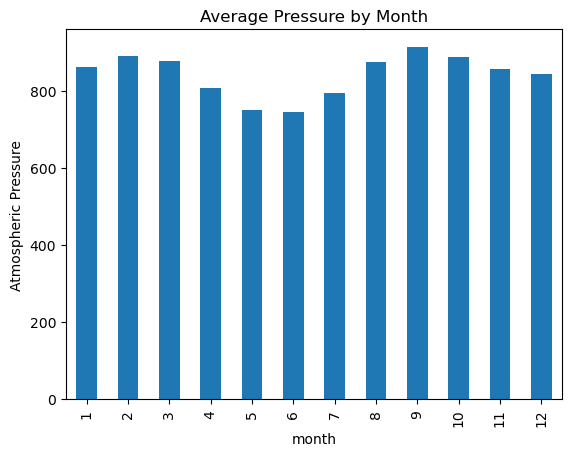

In [22]:
# Plot the average pressure by month
pressure_by_month.plot.bar(ylabel='Atmospheric Pressure', title='Average Pressure by Month', legend=False)
plt.show()

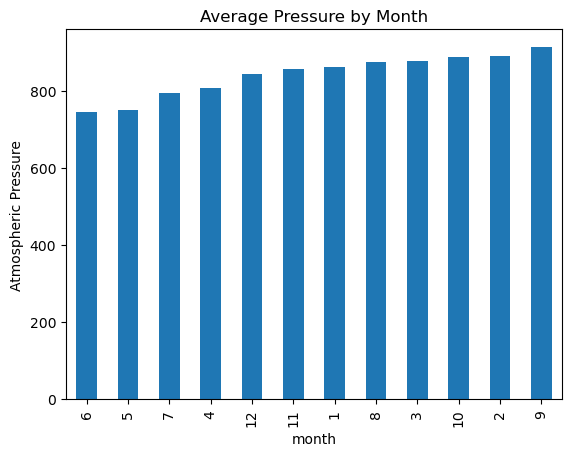

In [23]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressure_by_month_sorted = pressure_by_month.sort_values(by='pressure')
pressure_by_month_sorted.plot.bar(ylabel='Atmospheric Pressure', title='Average Pressure by Month', legend=False)
plt.show()

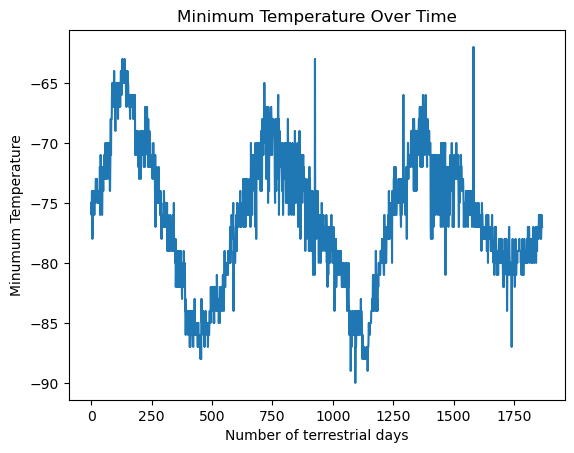

In [24]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Create dataframe from terrestrial_date and min_temp, df should be sorted by date to ensure accuracy
min_temp_over_time = pd.DataFrame(mars_df['terrestrial_date'])
min_temp_over_time['min_temp'] = mars_df['min_temp']
min_temp_over_time.sort_values(by='terrestrial_date')
# Create plot
min_temp_over_time.plot(y='min_temp', ylabel='Minumum Temperature', 
                        xlabel='Number of terrestrial days', 
                        title='Minimum Temperature Over Time', legend=False)
plt.show()

#### Note

Further research has revealed a possible issue with the data, since there are actually 24 Martian months according to "https://interimm.org/mars-clock/en/cal-doc.html". The provided data insinuates that there are only 12 months in the Martian calander and analysis

#### Minimum Temperature

The month with the lowest average minimum temperature is the third one with an average temperature of -83.31 degrees Celsius, the month with the highest average minimum temperature is -68.38 degrees Celsius. The temperature range is 14.93 degrees. 

#### Atmospheric Pressure

The month with the lowest atmospheric pressure is the sixth one with a pressure of 745.05 Pa, while the month with the highest pressure was 9 with 913.31 Pa. The pressure range is 168.26 Pa.

#### Year Length

The Minimum Temperature Over Time graph represents the cyclical nature of the temperature on Mars as time passes. It is reasonable to assert that the distance between two crests will approximately represent the length of the year on Mars. Using this method, the year on Mars seems to take around 700 terrestrial days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
filepath = Path('../Output/mars_weather_data.csv')   
mars_df.to_csv(filepath)

In [26]:
browser.quit()